In [40]:
sequences = []
with open("./rosalind_lcsm.txt", "r") as file:
    file.readline()
    seq = ""
    line = file.readline().strip()
    while line!="":
        # combine the lines before >
        if line[0] == ">":
            sequences.append(seq)
            seq = ""
        else:
            seq += line
        line = file.readline().strip()
    sequences.append(seq)
print(sequences)


['AGAGCACATCGTGCATGTATTTATTTTCGGGAGTACTCCACCGAACTAGCGTGAATTCGGCATCAAGCTAATATGTTGCCGCCCTCCGATTTCGAAAGGGAAACCTCAGGGGTGGAGCCGGCCACAAACCGGCTCAGTTGACGACTTACACGGCCTACATCTGCGGCAACTTAGTCTGACATCTAGCTGGGGTCGGAGATTCTTTAGCACAGGCGGTTTGGTTCGACCGTGACCCAGTTCTATAAAGTCGGTCTGTGGGGAGCGCAGCTTCTTTTTCCCGGAAGGGTGTCGATCTCCATTATTGGACTTCGGGTGAGGGTTACGCACGGCCGAGCGGTAGAATCGTGCCAAGCCTACACTCTCACCCCTACCAGACGCAGGACAAAAAACGGGTCGCCTACGGTGGAATCAAGCGTATCCTTGCCGTGCAAATAGTGTTAGAATCCAACCTTCTCCGTACAAGAATGTGGGCAGACCAGGGGTAGCTGTTTAGATATTCCCCCAGGTTTTAACGACGAAAAGATCGTGCACCCGCTAGCTGCGGTGCGCAGCGTAAGATAACAGAAGTCTTATCGGGGCAGTCTTGGTACGTGCTGAAAAGGTAGTCGGAGTCGCCGATTTAGATAACAGTGCATGCTGTGCTTAACGAAGTAATATTCGGTGATATTCTCGAAAGTCTATTCTCCCACGAAGCTTCAACTGCGAAAGAACGCTCTAGGAGATTCATAGCGCTACGGCGGTAAACTAATCACCGCCTGATTAGGGACGCTGGTGTGGGGCTAGTGAAGGCGCACGACGAGAACAGGCCAGACCCACCCCGTCTACTGTAGGTAGCTTCCTTTATCTTAACATGACTCCTGCCCCAATCACAGGGGCCTCTCTATTTCTCGGCCTCGCTGATTGAAGACTACGAACGTATATTTCTTGGCGGAGCAGAGACCGCTCCCGCCACTCTGCCGGCGCAGTGTAGGGCGATGGGCAAGCTTACTCGTTGGATC

In [41]:
def printmatrix(m,s1,s2):
    print("\  |"+"|".join([i for i in s1]))
    for n,i in enumerate(m):
        if n == 0:
            p = "  "+"|".join([str(j) for j in i])
        else:
            p = s2[n-1]+" "+"|".join([str(j) for j in i])
        print(p)
#         print("-"*(len(i)*2+4))


In [42]:
def longest_common_substring(s1, s2):
    m = [[0] * (len(s2))] * (len(s1))
    longest, x_longest = 0, 0
    for x in range(1, 1 + len(s1)):
        for y in range(1, 1 + len(s2)):
            if s1[x - 1] == s2[y - 1]:
                m[x][y] = m[x - 1][y - 1] + 1
                if m[x][y] > longest:
                    longest = m[x][y]
                    x_longest = x
            else:
                m[x][y] = 0
    print(s1[x_longest - longest: x_longest])
    printmatrix(m,s1,s2)
    return s1[x_longest - longest: x_longest]


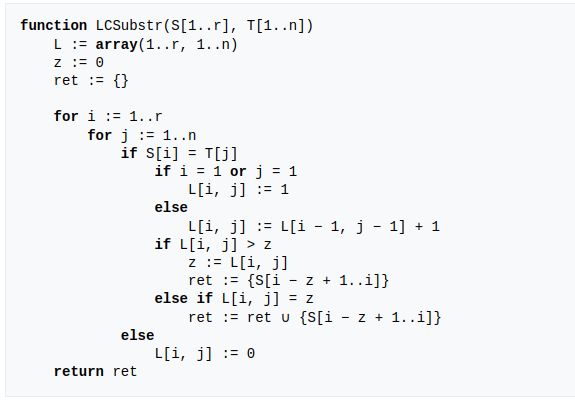

In [43]:
def lcs(S,T):
    # Comparison matrix if S[i-1][j-1] are same then M[i][j] = M[i-1][j-1] + 1
    M = [[0 for i in range(len(T)+1)] for j in range(len(S)+1)]
    # z has the length of the longest common substring
    z = 0
    # The substring that we have to return
    ret = []
    
    for i in range(len(S)+1):
        for j in range(len(T)+1):
            if i == 0 or j == 0:
                M[i][j] = 0
            elif S[i-1] == T[j-1]:
                M[i][j] = M[i-1][j-1] + 1
                if M[i][j] > z:
                    z = M[i][j]
                    ret = [S[(i-1)-z+1 : i]]
                elif M[i][j] == z:
                    ret = ret + [S[(i-1)-z+1:i]]
#                 printmatrix(M,S,T)
            else:
                M[i][j] = 0
            
    return ret

In [44]:
print(sequences[0],sequences[1])
coms = lcs(sequences[0],sequences[1])
# longest_common_substring(sequences[0],sequences[1])
coms

AGAGCACATCGTGCATGTATTTATTTTCGGGAGTACTCCACCGAACTAGCGTGAATTCGGCATCAAGCTAATATGTTGCCGCCCTCCGATTTCGAAAGGGAAACCTCAGGGGTGGAGCCGGCCACAAACCGGCTCAGTTGACGACTTACACGGCCTACATCTGCGGCAACTTAGTCTGACATCTAGCTGGGGTCGGAGATTCTTTAGCACAGGCGGTTTGGTTCGACCGTGACCCAGTTCTATAAAGTCGGTCTGTGGGGAGCGCAGCTTCTTTTTCCCGGAAGGGTGTCGATCTCCATTATTGGACTTCGGGTGAGGGTTACGCACGGCCGAGCGGTAGAATCGTGCCAAGCCTACACTCTCACCCCTACCAGACGCAGGACAAAAAACGGGTCGCCTACGGTGGAATCAAGCGTATCCTTGCCGTGCAAATAGTGTTAGAATCCAACCTTCTCCGTACAAGAATGTGGGCAGACCAGGGGTAGCTGTTTAGATATTCCCCCAGGTTTTAACGACGAAAAGATCGTGCACCCGCTAGCTGCGGTGCGCAGCGTAAGATAACAGAAGTCTTATCGGGGCAGTCTTGGTACGTGCTGAAAAGGTAGTCGGAGTCGCCGATTTAGATAACAGTGCATGCTGTGCTTAACGAAGTAATATTCGGTGATATTCTCGAAAGTCTATTCTCCCACGAAGCTTCAACTGCGAAAGAACGCTCTAGGAGATTCATAGCGCTACGGCGGTAAACTAATCACCGCCTGATTAGGGACGCTGGTGTGGGGCTAGTGAAGGCGCACGACGAGAACAGGCCAGACCCACCCCGTCTACTGTAGGTAGCTTCCTTTATCTTAACATGACTCCTGCCCCAATCACAGGGGCCTCTCTATTTCTCGGCCTCGCTGATTGAAGACTACGAACGTATATTTCTTGGCGGAGCAGAGACCGCTCCCGCCACTCTGCCGGCGCAGTGTAGGGCGATGGGCAAGCTTACTCGTTGGATCTA

['GGGTGAGGGTTACGCACGGCCGAGCGGTAGAATCGTGC']

In [46]:
seqs = sequences
print(seqs)
coms = set(lcs(seqs[0],seqs[1]))
notcoms = []
for subs in coms[-1:]:
    for seq in seqs:
        if subs not in seq:
            notcoms.append(subs)
submission = set(coms) - set(notcoms)
submission

['AGAGCACATCGTGCATGTATTTATTTTCGGGAGTACTCCACCGAACTAGCGTGAATTCGGCATCAAGCTAATATGTTGCCGCCCTCCGATTTCGAAAGGGAAACCTCAGGGGTGGAGCCGGCCACAAACCGGCTCAGTTGACGACTTACACGGCCTACATCTGCGGCAACTTAGTCTGACATCTAGCTGGGGTCGGAGATTCTTTAGCACAGGCGGTTTGGTTCGACCGTGACCCAGTTCTATAAAGTCGGTCTGTGGGGAGCGCAGCTTCTTTTTCCCGGAAGGGTGTCGATCTCCATTATTGGACTTCGGGTGAGGGTTACGCACGGCCGAGCGGTAGAATCGTGCCAAGCCTACACTCTCACCCCTACCAGACGCAGGACAAAAAACGGGTCGCCTACGGTGGAATCAAGCGTATCCTTGCCGTGCAAATAGTGTTAGAATCCAACCTTCTCCGTACAAGAATGTGGGCAGACCAGGGGTAGCTGTTTAGATATTCCCCCAGGTTTTAACGACGAAAAGATCGTGCACCCGCTAGCTGCGGTGCGCAGCGTAAGATAACAGAAGTCTTATCGGGGCAGTCTTGGTACGTGCTGAAAAGGTAGTCGGAGTCGCCGATTTAGATAACAGTGCATGCTGTGCTTAACGAAGTAATATTCGGTGATATTCTCGAAAGTCTATTCTCCCACGAAGCTTCAACTGCGAAAGAACGCTCTAGGAGATTCATAGCGCTACGGCGGTAAACTAATCACCGCCTGATTAGGGACGCTGGTGTGGGGCTAGTGAAGGCGCACGACGAGAACAGGCCAGACCCACCCCGTCTACTGTAGGTAGCTTCCTTTATCTTAACATGACTCCTGCCCCAATCACAGGGGCCTCTCTATTTCTCGGCCTCGCTGATTGAAGACTACGAACGTATATTTCTTGGCGGAGCAGAGACCGCTCCCGCCACTCTGCCGGCGCAGTGTAGGGCGATGGGCAAGCTTACTCGTTGGATC

TypeError: 'set' object is not subscriptable